
# ML recommendations


Case description: Mobile carrier Megaline is unhappy with the fact that many of their customers are using legacy plans. They want to develop a model that can analyze customer behavior and recommend one of Megaline's newer plans: Smart or Ultra.

You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model.

Develop a model with the highest possible *accuracy*. In this project, the threshold for *accuracy* is 0.75. Check the *accuracy* using the test dataset.

There is a preprocessed data set. It contains information on consumption within two tariffs. The dataset is preprocessed. On it, we plan to make a division into three samples: training, validation and test for training the model. The model predicts with varying degrees of accuracy which tariff should be chosen.

So far, we use three types of models with different quality and speed. Let's leave speed aside for now. Our task is to find the most accurate predictive model. This answer will be in the conclusions.

References:

<a href='https://www.jeremyjordan.me/hyperparameter-tuning/'>Decision tree hyperparameter tuning</a>

<a href='https://habr.com/en/company/ruvds/blog/488342/'>Tuning random forest hyperparameters</a>

<a href = 'https://stackoverflow.com/questions/60868629/valueerror-solver-lbfgs-supports-only-l2-or-none-penalties-got-l1-penalty'>Setting up logistic regression</a>

In [1]:
import pandas as pd
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
pd.options.display.max_columns = None

Defaulting to user installation because normal site-packages is not writeable


## Preprocessing

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Text(0.5, 1.0, 'Полнота данных')

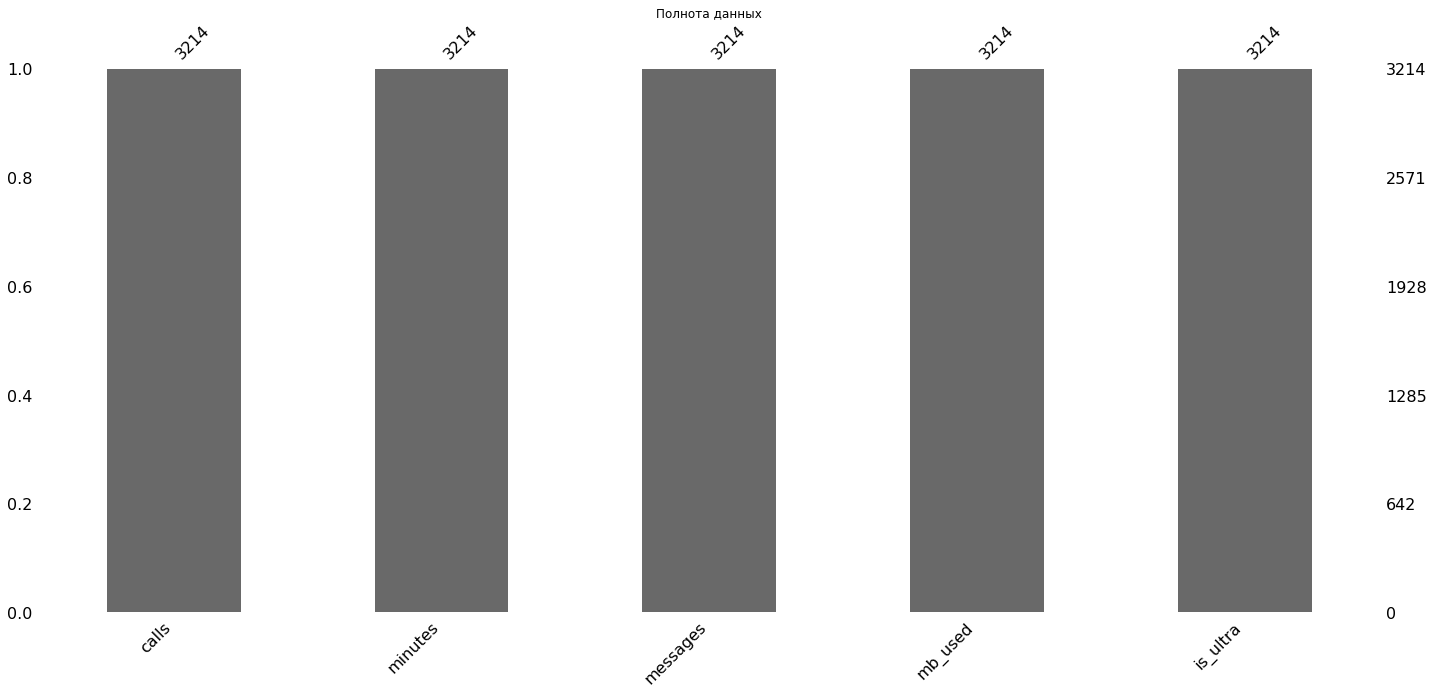

In [3]:


msno.bar(df).set_title('Fullness of Data')

Data types

In [4]:
print(df.dtypes)

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object


## Partitionning

Might be intersections

`train, valid_test = train_test_split(df, test_size = 0.4)`

`valid, test = train_test_split(valid_test, test_size = 0.5, random_state=12345)`

In [5]:
train, valid = train_test_split(df, test_size = 0.2)
train, test = train_test_split(train, test_size = 0.25, random_state=12345)
print('Partition check ', len(valid) + len(test) + len(train))


Проверка разбивки  3214


In [6]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

#Validation sample
features_valid = valid.drop(['is_ultra'], axis=1)
target_valid = valid['is_ultra']

#Training sample
features_train = train.drop(['is_ultra'], axis=1)
target_train = train['is_ultra']

#Test sample
features_test = test.drop(['is_ultra'], axis=1)
target_test = test['is_ultra']

In [7]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(1928, 4)
(643, 4)
(643, 4)


## Models exploration

### Random Forest

In [8]:
# Slow but good quality
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1]:
#Teaching the model
estimators = []
accuracy_forest = []
criterion=[{'gini', 'entropy'}]

#leafs = []
best_model_forest = None
best_result_forest = 0

for estimator in range(1, 10, 2):
    for c in criterion:
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=estimator, criterion=criterion)
        model_forest.fit(features_train, target_train)
        score_forest = model_forest.score(features_valid, target_valid)
        estimators.append(estimator)
        accuracy_forest.append(score_forest)
        #splits.append(split)
        #leafs.append(leaf)
        accuracy_forest.append(score_forest)
        if score_forest > best_result_forest:
            best_model_forest = model_forest# сохраните наилучшую модель
            best_result_forest = score_forest #  сохраните наилучшее значение метрики accuracy на валидационных данных

print("Точность наилучшей модели случайного леса на валидационной выборке:", best_result_forest)

NameError: name 'RandomForestClassifier' is not defined

In [10]:
print('Parameters of Random Forest:\n')
print(model_forest.get_params())

Параметры решающего дерева:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 9, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


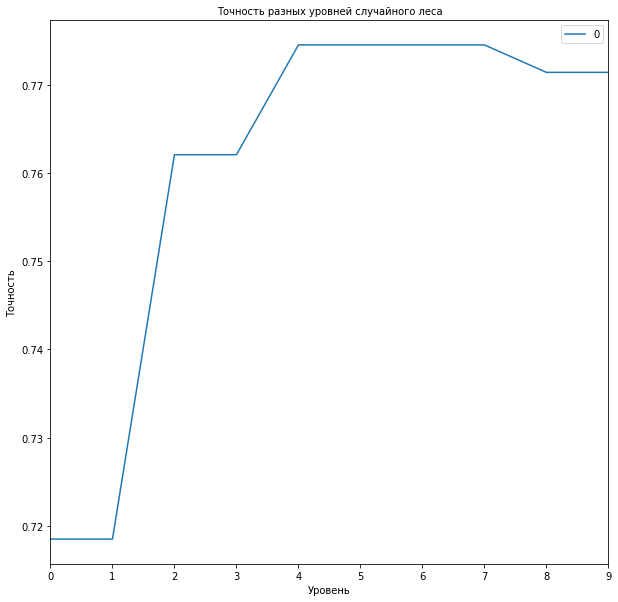

In [11]:
df_forest = pd.DataFrame(data = accuracy_forest)
df_forest.plot(kind='line', figsize=(10, 10))
plt.title("Precision of different depths of Ramdom Tree", fontsize=10)
plt.ylabel("Precision") 
plt.xlabel("Depth")
plt.show()

Summary: A value of 6 evaluative performativity does not change much. It is optimal to stop at the appraiser = -**.
Although our initial data is unevenly distributed, but this is only in the end.

### Decision tree in regression

In [12]:
# High speed not great quality
from sklearn.tree import DecisionTreeClassifier

In [13]:
# Cheching depths
depths = []
#leafs = [1,2]
accuracy_decision = []
best_model_tree = None
best_result_tree = 0

for depth in range(1,10):
    
            model_dcsntree = DecisionTreeClassifier(max_depth = depth, random_state = 12345)
            model_dcsntree.fit(features_train, target_train)
            predictions_decision = model_dcsntree.predict(features_valid)
            
            predictions_valid = model_dcsntree.predict(features_valid)
            score_decision = accuracy_score(target_valid, predictions_valid)
            depths.append(depth)
            #leafs.append(leaf)
            accuracy_decision.append(score_decision)
            if score_decision > best_result_tree:
                best_model_tree = model_dcsntree
                best_result_tree = score_decision
        
print(" Precision of the best model of decision tree: {:.2f}".format(best_result_tree))

Точность лучшей модели дерева решений: 0.79


**Went through the depths, the rest of the parameters are not very obviously performative**.

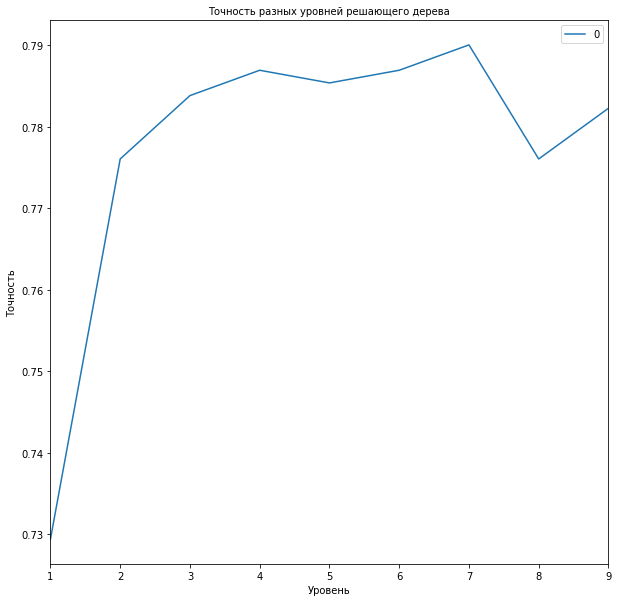

In [14]:
df_decision = pd.DataFrame(data=accuracy_decision, index=depths)
df_decision.plot(figsize=(10, 10))
plt.title("Precision of depths of the Decision tree", fontsize=10)
plt.ylabel("Precision") 
plt.xlabel("Depth")
plt.show()

** Unstable**

In [15]:
print('Параметры решающего дерева:\n')
print(model_dcsntree.get_params())

Параметры решающего дерева:

{'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 12345, 'splitter': 'best'}


**Visualisation**

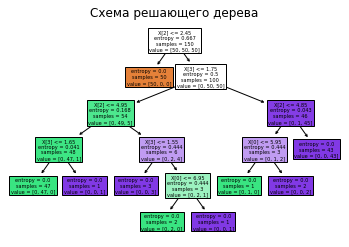

In [16]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=12345)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf, filled=True, fontsize=5)
plt.title('Decision tree Schema')
plt.show()

### Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
solvers = {'saga', 'liblinear'}
penalties = {'l1', 'l2'}
warm_start = {True, False}
accuracy_logregress = []

best_model_logregress = None
best_result_logregress = 0


for s in solvers:
    for p in penalties:
        model_logregress = LogisticRegression(random_state=12345, penalty=p, solver=s)
        model_logregress.fit(features_train, target_train)
        score_logregress = model_logregress.score(features_valid, target_valid)
        accuracy_logregress.append(score_logregress)
        if score_logregress > best_result_logregress:
            best_model_logregress = model_logregress
            best_result_logregress = score_logregress
        
print("Precision on the best model LR: {:.2f}".format(best_result_logregress))

Точность лучшей модели лог.регр.: 0.73


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [19]:

solver2 = {'sag','lbfgs','newton-cg'}
penalties2 = {'l2'}
accuracy_logregress2 = []
best_model2 = None
best_result2 = 0

for s in solver2:
        for p in penalties2:
            model_logregress2 = LogisticRegression(random_state=12345, penalty=p, solver=s)
            model_logregress2.fit(features_train, target_train)
            score_logregress2 = model_logregress2.score(features_valid, target_valid)
            accuracy_logregress2.append(score_logregress2)
            if score_logregress2 > best_result2:
                best_model2 = model_logregress2
                best_result2 = score_logregress2
print("Precision of the best model: {:.2f}".format(best_result2))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Точность лучшей модели лог.регр.: 0.73


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

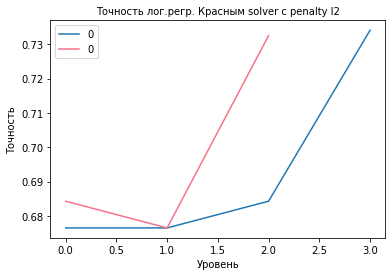

In [20]:
import seaborn as sns
df_logr = pd.DataFrame(data=accuracy_logregress)
df_logr2 = pd.DataFrame(data=accuracy_logregress2)
sns.lineplot(data=df_logr)
sns.lineplot(data=df_logr2, palette = "husl")
plt.title("Precision of LR. Solver with penalty l2 in red", fontsize=10)
plt.ylabel("Precision") 
plt.xlabel("Depth")
plt.show()

## Testing

In [21]:
#
predictions_rndm = best_model_forest.predict(features_test)
result_rndm = accuracy_score(target_test, predictions_rndm)
print("Precision of the best model RF: {:.2f}".format(result_rndm))

Точность наилучшей модели случайного леса на тестовой выборке: 0.77


In [22]:

predictions_tree = best_model_tree.predict(features_test)
score_dcsn = accuracy_score(target_test, predictions_tree)
print('Precision of the best model DT: {:.2f}'.format(score_dcsn))

Точность решающего дерева по тестовой: 0.81


In [23]:
#Точность лог.регрессии на тестовой
predictions_logregress = best_model_logregress.predict(features_test)
score_logr = accuracy_score(target_test, predictions_logregress)
print("Precision of the best model LR: {:.2f}".format(score_logr))

Точность наилучшего результата модели лог.регрессии на валидационной выборке: 0.77


In [24]:
#for l1
predictions_logregress = best_model2.predict(features_test)
score_logr = accuracy_score(target_test, predictions_logregress)
print("Precision of the best model LR ('sag','lbfgs','newton-cg'): {:.2f}".format(score_logr))

Точность наилучшего результата модели лог.регрессии ('sag','lbfgs','newton-cg') на валидационной выборке: 0.77


## Checking models for adequacy

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64


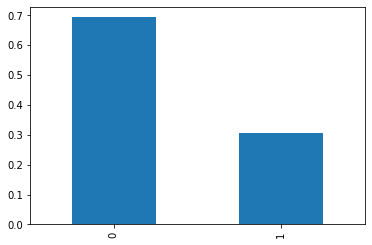

In [25]:
class_frequency = df['is_ultra'].value_counts(normalize=1)
print(class_frequency)
class_frequency.plot(kind='bar')

# Conclusions


After several launches, only a random forest behaved stably.
In the data, the proportion of tariffs is distributed in the ratio of 69% to 31%.